In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras import layers, models

2025-05-19 01:29:26.416394: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-19 01:29:26.425237: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-19 01:29:26.456076: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747614566.500583   21044 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747614566.513450   21044 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747614566.555841   21044 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [11]:
pip install tensorflow

  Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.71.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached h5py-3.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.me

In [3]:
# Chargement des données
df = pd.read_csv("dataset.csv")

In [4]:
# Filtrage des éléments utiles
df = df[df['Element'].isin(['Area harvested', 'Yield', 'Production'])]
df = df.pivot_table(index=['Area', 'Item', 'Year'], columns='Element', values='Value').reset_index()
df = df.dropna()

In [5]:
# Données d’entrée et cible
X = df[['Area', 'Item', 'Year', 'Area harvested', 'Production']]
y = df['Yield']

In [6]:
# Séparation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:

# Prétraitement
numeric_features = ['Year', 'Area harvested', 'Production']
categorical_features = ['Area', 'Item']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [9]:
# 🔧 Transformer les données
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

In [11]:
# 🧠 Modèle Deep Learning
model = models.Sequential([
    layers.Input(shape=(X_train_proc.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

In [12]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 🏋️ Entraînement du modèle
history = model.fit(X_train_proc, y_train, validation_split=0.1, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 123735272.0000 - mae: 5404.2939 - val_loss: 155613856.0000 - val_mae: 6365.2510
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 107549976.0000 - mae: 4913.5127 - val_loss: 155544512.0000 - val_mae: 6359.9653
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 157041600.0000 - mae: 5876.3921 - val_loss: 155362768.0000 - val_mae: 6346.4546
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 115535936.0000 - mae: 5072.9307 - val_loss: 154936624.0000 - val_mae: 6314.8701
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 140469696.0000 - mae: 5547.4683 - val_loss: 154153680.0000 - val_mae: 6256.7119
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 134193352.0000 - mae: 5193.5039 - val_loss: 152886144.0000 - val_mae: 6163.7563
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 155563888.0000 - mae: 5618.0068 - val_loss: 151117024.0000 - val_mae: 6038.0181
Epoch 8/50
44/44 ━━━━━━━━━━

In [13]:
# 📊 Évaluation
loss, mae = model.evaluate(X_test_proc, y_test)
print(f"MAE (Mean Absolute Error) sur le test set : {mae:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 87233096.0000 - mae: 4299.3594
MAE (Mean Absolute Error) sur le test set : 3880.25


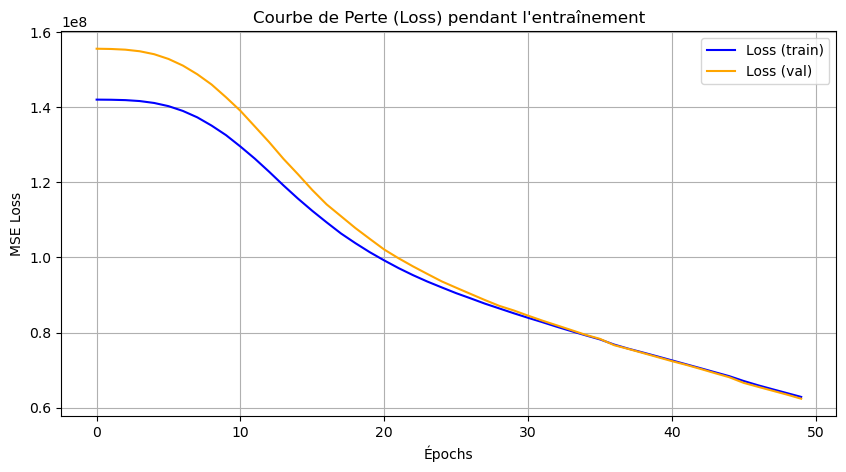

In [14]:
import matplotlib.pyplot as plt

# 📈 Courbe de perte
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Loss (train)', color='blue')
plt.plot(history.history['val_loss'], label='Loss (val)', color='orange')
plt.xlabel('Épochs')
plt.ylabel('MSE Loss')
plt.title('Courbe de Perte (Loss) pendant l\'entraînement')
plt.legend()
plt.grid(True)
plt.show()


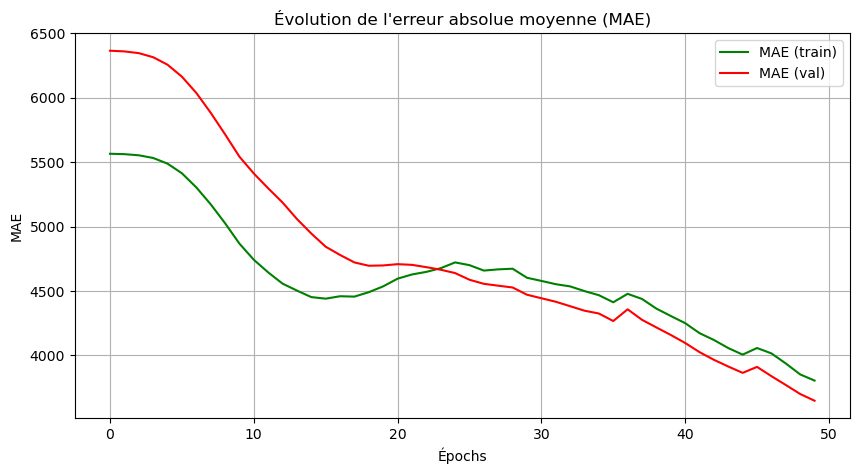

In [15]:
# 📈 Courbe de MAE
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='MAE (train)', color='green')
plt.plot(history.history['val_mae'], label='MAE (val)', color='red')
plt.xlabel('Épochs')
plt.ylabel('MAE')
plt.title('Évolution de l\'erreur absolue moyenne (MAE)')
plt.legend()
plt.grid(True)
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step 


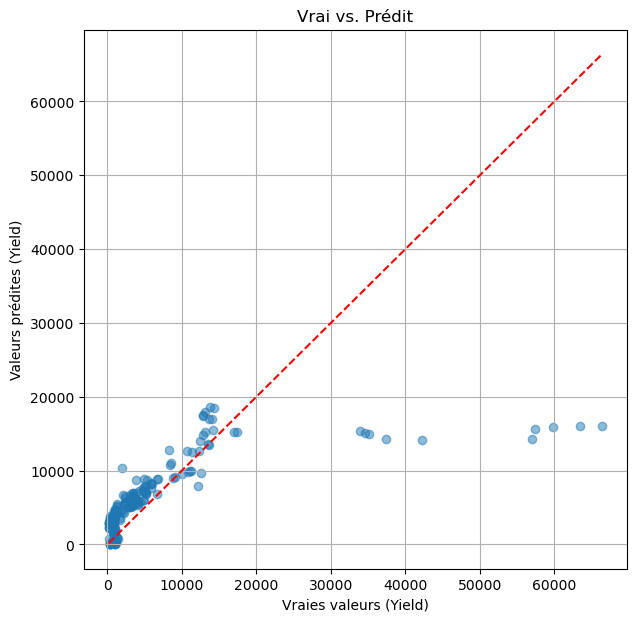

In [16]:
# 🔮 Prédictions
y_pred = model.predict(X_test_proc).flatten()

# 🎯 Scatter plot
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Vraies valeurs (Yield)')
plt.ylabel('Valeurs prédites (Yield)')
plt.title('Vrai vs. Prédit')
plt.grid(True)
plt.show()
